In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_true_false_positives(prob, y, threshold):
    """
    prob: predicted probilities of outcome of interest by your model
    y: outcome of interest. Yes is coded as 1, No is coded as 0
    threshold: ignore, will be used later in decision curve analysis function
    
    Returns: net benefit of "treat based on model predictions" strategy for the specified threshold
    """
    
    TP = FP = 0
    for j, i in zip(prob, y):
        if j>=(threshold/100) and i==1:
            TP += 1
        if j>=(threshold/100) and i==0:
            FP += 1
    
    NB = (TP/len(y)) - (FP/len(y))*((threshold/100)/(1-(threshold/100)))
    return NB

In [3]:
def calc_treatall_true_false_positives(y, threshold):
    """
    y: outcome of interest. Yes is coded as 1, No is coded as 0
    threshold: ignore, will be used later in decision curve analysis function
    
    Returns: net benefit of "treat-all" strategy for the specified threshold
    """
    
    TP = FP = 0
    for i in y:
        if i==1:
            TP += 1
        else:
            FP += 1
    
    NB = (TP/len(y)) - (FP/len(y))*((threshold/100)/(1-(threshold/100)))
    return NB

In [4]:
def draw_decision_curve(prob, y, title='Decision Curve Analysis'):
    """
    prob: predicted probabilities of outcome of interest by your model
    y: outcome of interest. Yes is coded as 1, No is coded as 0
    
    Returns: plot of net benefit for "treat-none", "treat-all", and "treat based on model predictions"
             strategies across thresholds 0-100.
    """
    
    NB = []
    NB_treatall = []
    
    for k in np.linspace(0,99.5,200):
        # Calculate and save net benefit for "treat based on model predictions" strategy
        NB_thresh = calc_true_false_positives(prob, y, k)
        NB.append(NB_thresh)
        
        # Calculate and save net benefit for "treat-all" strategy
        NB_all = calc_treatall_true_false_positives(y, k)
        NB_treatall.append(NB_all)
    
    threshold = np.linspace(0,99.5,200)
    
    # Plot net benefit of "treat based on model predictions" strategy
    plt.plot(threshold, NB, color='b',
             label=r'Model',
             lw=1, alpha=.8)
    
    # Plot net benefit of "treat-all" strategy
    plt.plot(threshold, NB_treatall, color='k', linestyle='--',
             label=r'Treat all',
             lw=1, alpha=.5)
    
    #Plot net benefit of "treat-none" strategy
    plt.plot([0, 100], [0, 0], linestyle='-', lw=1, color='k',
             label='Treat none', alpha=.5)
    
    plt.xticks(np.arange(0, 100, step=10))
    plt.yticks(np.arange(0, 1, step=0.1))
    plt.xlim([0, 100]) # Adjust scale as necessary
    plt.ylim([-0.02, 0.3]) # Adjust scale as necessary
    plt.grid(b=True, which='major', axis='both', alpha=.5)
    plt.xlabel('Threshold probability (%)')
    plt.ylabel('Net benefit')
    plt.title(title)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), fancybox=True, shadow=False, ncol=2)
    plt.figure(figsize=[15,10], dpi=600)
    plt.show()

In [5]:
# Demonstration of draw_decision_cruve
# Import predicted probabilities for all models
data = pd.read_csv(r'...validation probabilities.csv')

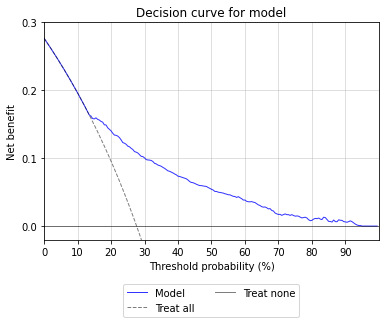

<Figure size 9000x6000 with 0 Axes>

In [6]:
# Run decision curve function
draw_decision_curve(data['Probabilities'],                  
                    data['Outcome'],
                    title = 'Decision curve for model')